In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv('~/data/twitter/convec_ds.csv')
ds.shape

(520263, 10)

In [3]:
ds.columns

Index(['id', 'screen_name', 'latitude', 'longitude', 'in_reply_to_status_id',
       'text', 'timestamp', 'conversation_id', 'conversation_deep', 'url'],
      dtype='object')

In [5]:
ds[ds.in_reply_to_status_id.isnull()].groupby('screen_name').size().sort_values(ascending=False).head()


screen_name
aguschmer        5257
MashiRafael      5060
KarlaMoralesR    1768
adeljar            11
la_abogada_        11
dtype: int64

In [11]:
root_conv = ds[ds.in_reply_to_status_id.isnull()]
sample1 = root_conv[root_conv.screen_name=='aguschmer']

In [15]:
sample1.sample(2)[['text','conversation_id']].values

array([['Por si acaso no era mentira lo de las entradas de @SebastianYatra y @piso21music jajaja.... las del concierto de es… https://t.co/ZSkBRNwtCH',
        961673425294102528],
       ['Con razón hizo buen trabajo.Un árbitro q reacciona con tanto humor merece q le den la final jajaja http://t.co/59HCp2rPej vía @xabierloor',
        479403384584568834]], dtype=object)

In [19]:
ds[ds.conversation_id==961673425294102528].shape

(3, 10)

In [18]:
ds[ds.conversation_id==961673425294102528].text

91326    Por si acaso no era mentira lo de las entradas...
91327    @aguschmer @SebastianYatra @piso21music ya te ...
91328    @aguschmer @SebastianYatra @piso21music Andrés...
Name: text, dtype: object

In [20]:
ds.groupby('conversation_id').size().sort_values(ascending=False).head()

conversation_id
960286303014346758    2771
960370022282682369    2428
960321320956375040    2225
941078716448460800    1974
958731588807905283    1406
dtype: int64

In [32]:
ds.groupby('conversation_id').size().sample(5)

conversation_id
746037660666503168    5
944642411887767553    1
920695219657551872    1
736355546400428032    2
902894916656922625    2
dtype: int64

In [45]:
import networkx as nx
def generating_dialogs( conv_data):
	conv_graph = nx.DiGraph()
	#conv_graph.add_node(conv_id)
	for i, row in conv_data.iterrows():
		tweet_id = row['id']
		parent_id = row['in_reply_to_status_id']

		if parent_id == '':
			continue

		conv_graph.add_edge(tweet_id,parent_id)
	return conv_graph

In [46]:
conv_data= ds[ds.conversation_id==746037660666503168]
conv_graph = generating_dialogs(conv_data)

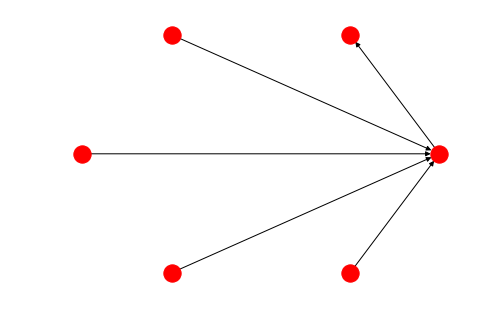

In [47]:
nx.draw_shell(conv_graph)